### 오형짱의 플레이리스트 확인

In [1]:
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from oauth2client.tools import argparser
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [3]:
# pip install oauth2client

In [4]:
api_key = '-'
youtube_api_service_name = 'youtube'
youtube_api_version = 'v3'

youtube = build(youtube_api_service_name, youtube_api_version, developerKey = api_key)

In [5]:
search_response = youtube.search().list(q = '오형짱',
                                       order = 'relevance',
                                       part = 'snippet',
                                       maxResults = 50).execute()

In [6]:
channel_id = search_response['items'][0]['snippet']['channelId']

In [7]:
playlists = youtube.playlists().list(channelId = channel_id,
                                    part = 'snippet',
                                    maxResults = 50).execute()

In [8]:
ids = []
titles = []
for i in playlists['items']:
    ids.append(i['id'])
    titles.append(i['snippet']['title'])
    
df = pd.DataFrame([ids, titles])

In [9]:
df = df.T

In [10]:
df.columns = ['PlayLists', 'Titles']

In [11]:
df

,PlayLists,Titles
0,PLHYQJWOjUBxgArVL_PrW-Za4OaBbyDCyO,던파모바일
1,PLHYQJWOjUBxhTU9HIsiN1h_wAPEq57Dji,애니메이션
2,PLHYQJWOjUBxgd0vfG84xSDLyTeqQCc6Te,2022 어썰트 육성기
3,PLHYQJWOjUBxgBTarj5RFuYSW-7Iu-bJt8,스펙상담소
4,PLHYQJWOjUBxjgQowA5Mml2xjKLy4BeM5r,던전 공략 모음
5,PLHYQJWOjUBxhCGsH7TcquEP6SGp_E_eUR,던파 플레이 영상
6,PLHYQJWOjUBxjxC2J0of1N_LH4pXTg1yWr,던파 꿀팁
7,PLHYQJWOjUBxhq9WrC25fNMc0PuGN7mD43,던파 리뷰
8,PLHYQJWOjUBxgUu9a4SLirPhGX0ckOeiRg,던파 직업계급표


In [12]:
# pip install resource

# 특정 플레이리스트의 영상목록 가져오기

# 던파 M
- '던파모바일' 목록의 영상들 불러오기.

In [17]:
# '던파모바일'의 영상들

update_videos = df['PlayLists'][0]

playlist_videos = youtube.playlistItems().list(playlistId = update_videos,
                                              part = 'snippet',
                                              maxResults = 50) # 50개 동영상 뽑아보기
playlistitems_list_response = playlist_videos.execute()

video_names = []
video_ids = []
date = []

for v in playlistitems_list_response['items']:
    video_names.append(v['snippet']['title'])
    video_ids.append(v['snippet']['resourceId']['videoId'])
    date.append(v['snippet']['publishedAt'])

video_df = pd.DataFrame([date, video_names, video_ids]).T
video_df.columns = ['Date', 'Title', 'IDS']

In [18]:
video_df

,Date,Title,IDS
0,2022-03-27T12:54:00Z,【던파모바일】 캐릭 순위는 이것만 보면 끝! 던파M 4월 직업계급표! (전 직업 캐...,6_VD_AKWdX0
1,2022-03-25T11:35:46Z,【던파 모바일】 던파M 복귀한 아재들 근황ㅋㅋㅋㅋㅋ#shorts,3sZpRE86DUQ
2,2022-03-25T11:36:56Z,【던파 모바일】 던파M 복귀한 아재들 근황ㅋㅋㅋㅋㅋ#shorts,3sZpRE86DUQ
3,2022-03-29T12:07:09Z,【던파모바일】 무자본으로 레압풀셋?! 던파M 일확천금을 노려보자 파밍꿀팁 (DNF ...,RmjWLPr6Yy8
4,2022-03-25T11:35:46Z,【던파모바일】 아니 님아 왜 똥캐를 키우고 계세요... (전 직업 선택 추천 가이드),2z7MXgeO-V8
5,2022-04-08T06:26:20Z,"[던파모바일] 아직도 모르세요? 공짜로 레압, 로터스 다 할 수 있어요!! /새로 ...",ANYrlWHo-2o
6,2022-03-25T11:36:56Z,【던파M】 던파 모바일 공개!! 뭐야 이거 생각보다 괜찮네..?,Tq2tPfguZ2U
7,2022-03-25T11:36:56Z,【던파M】 던파 모바일 11월 기습 공개!! 국내 출시 확정 소식,-aVo0BLv_IM
8,2022-03-28T10:20:30Z,【던파모바일】 아니 어떻게 랭킹 1등이 핵임? (월드보스 핵쟁이 등장),pE_2Swhcxb8
9,2022-03-26T11:01:06Z,"【던파모바일】 랭킹 1위 달성 기념 던파M 결투장 직업 티어표, 결투장 추천 가이드",0OsWkGya8L0


#### 조회수, 좋아요, 영상길이, 제목 수집

In [19]:
# 해당 각 영상들의 정보 수집

import re

ids = []
dates = []
category_id = []
views = []
likes = []
dislikes = []
comments = []
title = []
mins = [] # 분
secs = [] # 초

for i in range(len(video_df)):
    request = youtube.videos().list(part = 'snippet, contentDetails, statistics',
                                   id = video_df['IDS'][i])
    response = request.execute()
    
    if response['items'] == []:
        ids.append('-')
        dates.append('-')
        category_id.append('-')
        views.append('-')
        likes.append('-')
        dislikes.append('-')
        comments.append('-')
        mins.append('-')
        secs.append('-')
    else:
        title.append(response['items'][0]['snippet']['title'])
        ids.append(video_df['IDS'][i])
        dates.append(response['items'][0]['snippet']['publishedAt'].split('T')[0])
        category_id.append(response['items'][0]['snippet']['categoryId'])
        views.append(response['items'][0]['statistics']['viewCount'])
        likes.append(response['items'][0]['statistics']['likeCount'])
        comments.append(response['items'][0]['statistics']['commentCount'])
        
update_videos_df = pd.DataFrame([title, ids, dates, category_id, views, likes, comments]).T
update_videos_df.columns = ['title', 'video_id', 'date', 'category_id', 'views', 'likes', 'comments']

In [20]:
update_videos_df

,title,video_id,date,category_id,views,likes,comments
0,【던파모바일】 캐릭 순위는 이것만 보면 끝! 던파M 4월 직업계급표! (전 직업 캐...,6_VD_AKWdX0,2022-03-27,20,266743,788,331
1,【던파 모바일】 던파M 복귀한 아재들 근황ㅋㅋㅋㅋㅋ#shorts,3sZpRE86DUQ,2022-03-25,20,162927,609,102
2,【던파 모바일】 던파M 복귀한 아재들 근황ㅋㅋㅋㅋㅋ#shorts,3sZpRE86DUQ,2022-03-25,20,162927,609,102
3,【던파모바일】 무자본으로 레압풀셋?! 던파M 일확천금을 노려보자 파밍꿀팁 (DNF ...,RmjWLPr6Yy8,2022-03-29,20,97734,330,76
4,【던파모바일】 아니 님아 왜 똥캐를 키우고 계세요... (전 직업 선택 추천 가이드),2z7MXgeO-V8,2022-03-23,20,79851,211,58
5,"[던파모바일] 아직도 모르세요? 공짜로 레압, 로터스 다 할 수 있어요!! /새로 ...",ANYrlWHo-2o,2022-04-08,20,58178,455,22
6,【던파M】 던파 모바일 공개!! 뭐야 이거 생각보다 괜찮네..?,Tq2tPfguZ2U,2021-12-20,20,48334,183,91
7,【던파M】 던파 모바일 11월 기습 공개!! 국내 출시 확정 소식,-aVo0BLv_IM,2021-11-01,20,36477,196,200
8,【던파모바일】 아니 어떻게 랭킹 1등이 핵임? (월드보스 핵쟁이 등장),pE_2Swhcxb8,2022-03-28,20,30526,118,47
9,"【던파모바일】 랭킹 1위 달성 기념 던파M 결투장 직업 티어표, 결투장 추천 가이드",0OsWkGya8L0,2022-03-26,20,30470,74,78


In [20]:
update_videos_df.to_csv('C:/Users/dhckd/Study/CodingWorld/기술과제들/네오플/장지_M.csv')

# 던파 PC
### 재생목록 선정에 있어서 최근까지 업데이트 된 재생목록으로 선정하였다. (총 4개)
- 스펙상담소
- 던전 공략 모음 (던파 M 영상 1개 포함. 제외해야 함)
- 던파 꿀팁
- 던파 리뷰

In [21]:
# '스펙상담소'의 영상들

update_videos = df['PlayLists'][3]

playlist_videos = youtube.playlistItems().list(playlistId = update_videos,
                                              part = 'snippet',
                                              maxResults = 50) # 50개 동영상 뽑아보기
playlistitems_list_response = playlist_videos.execute()

video_names = []
video_ids = []
date = []

for v in playlistitems_list_response['items']:
    video_names.append(v['snippet']['title'])
    video_ids.append(v['snippet']['resourceId']['videoId'])
    date.append(v['snippet']['publishedAt'])


video_df = pd.DataFrame([date, video_names, video_ids]).T
video_df.columns = ['Date', 'Title', 'IDS']



# 해당 각 영상들의 정보 수집

import re

ids = []
dates = []
category_id = []
views = []
likes = []
dislikes = []
comments = []
title = []
mins = [] # 분
secs = [] # 초

for i in range(len(video_df)):
    request = youtube.videos().list(part = 'snippet, contentDetails, statistics',
                                   id = video_df['IDS'][i])
    response = request.execute()
    
    if response['items'] == []:
        ids.append('-')
        dates.append('-')
        category_id.append('-')
        views.append('-')
        likes.append('-')
        dislikes.append('-')
        comments.append('-')
        mins.append('-')
        secs.append('-')
    else:
        title.append(response['items'][0]['snippet']['title'])
        ids.append(video_df['IDS'][i])
        dates.append(response['items'][0]['snippet']['publishedAt'].split('T')[0])
        category_id.append(response['items'][0]['snippet']['categoryId'])
        views.append(response['items'][0]['statistics']['viewCount'])
        likes.append(response['items'][0]['statistics']['likeCount'])
        comments.append(response['items'][0]['statistics']['commentCount'])
        
update_videos_df1 = pd.DataFrame([title, ids, dates, category_id, views, likes, comments]).T
update_videos_df1.columns = ['title', 'video_id', 'date', 'category_id', 'views', 'likes', 'comments']

In [22]:
update_videos_df1

,title,video_id,date,category_id,views,likes,comments
0,【던파】던린이가 왜 이렇게 쎄..? 105제 에픽 스펙상담소,rvtnb4FXGaM,2022-04-26,20,19823,98,26
1,"던파 에픽, 신화 이대로만 하면 오즈마 깹니다... 오형짱 스펙상담소",8AiV5dUQEK0,2022-01-22,20,33042,205,55
2,던파 이걸로 오즈마 3단쩔?? 절대 안됩니다... 오형짱 스펙상담소,KsDZJzBIyWc,2021-11-08,20,38921,163,33
3,던파 퓨딜인데 오즈마 취업이 안됩니다... 오형짱 스펙상담소,7oJHQPm8HZw,2021-08-12,20,61792,192,56
4,던파 기구 쓸까요 군마갈 쓸까요?! 오형짱 스펙상담소,AB0vhajKDM0,2021-07-19,20,35001,147,66
5,"던파 25세이상 ""그직업""에도 사막을 입히라고요?ㅋㅋㅋㅋㅋ",hlj4PF61_6s,2021-06-03,20,24074,110,50
6,던파 1조 딜러 집착 제발 그만하세요!! 스펙상담소,VgwJrrX15tE,2021-05-06,20,29266,135,36
7,던파 최강 모험단 세팅 완벽하게 끝냈습니다 오즈마 준비OK,QJ9uXPdOBfw,2021-04-25,20,24876,103,29
8,던파 이 스펙은 에테르나 하는 거 아닙니다 투자를 하세요,6WT1XleRF4k,2021-03-16,20,27040,124,70
9,"던파 스펙상담소 ""시로코 졸업의 기준""",f89adcoMxDY,2020-11-06,20,29484,134,44


In [23]:
# '던전 공략 모음'의 영상들

update_videos = df['PlayLists'][4]

playlist_videos = youtube.playlistItems().list(playlistId = update_videos,
                                              part = 'snippet',
                                              maxResults = 50) # 50개 동영상 뽑아보기
playlistitems_list_response = playlist_videos.execute()

video_names = []
video_ids = []
date = []

for v in playlistitems_list_response['items']:
    video_names.append(v['snippet']['title'])
    video_ids.append(v['snippet']['resourceId']['videoId'])
    date.append(v['snippet']['publishedAt'])


video_df = pd.DataFrame([date, video_names, video_ids]).T
video_df.columns = ['Date', 'Title', 'IDS']




# 해당 각 영상들의 정보 수집

import re

ids = []
dates = []
category_id = []
views = []
likes = []
dislikes = []
comments = []
title = []
mins = [] # 분
secs = [] # 초

for i in range(len(video_df)):
    request = youtube.videos().list(part = 'snippet, contentDetails, statistics',
                                   id = video_df['IDS'][i])
    response = request.execute()
    
    if response['items'] == []:
        ids.append('-')
        dates.append('-')
        category_id.append('-')
        views.append('-')
        likes.append('-')
        dislikes.append('-')
        comments.append('-')
        mins.append('-')
        secs.append('-')
    else:
        title.append(response['items'][0]['snippet']['title'])
        ids.append(video_df['IDS'][i])
        dates.append(response['items'][0]['snippet']['publishedAt'].split('T')[0])
        category_id.append(response['items'][0]['snippet']['categoryId'])
        views.append(response['items'][0]['statistics']['viewCount'])
        likes.append(response['items'][0]['statistics']['likeCount'])
        comments.append(response['items'][0]['statistics']['commentCount'])
        
update_videos_df2 = pd.DataFrame([title, ids, dates, category_id, views, likes, comments]).T
update_videos_df2.columns = ['title', 'video_id', 'date', 'category_id', 'views', 'likes', 'comments']

In [24]:
update_videos_df2

,title,video_id,date,category_id,views,likes,comments
0,[던파모바일] 로터스 레이드 공략 3페까지 이걸로 완벽하게 끝!,UiJeGl0g934,2022-04-28,20,20622,202,45
1,【던파】 꼭 알아야 하는 '노블레스 코드' 완벽 공략 A to Z,_tNwqkzQaYU,2022-03-11,20,75790,436,47
2,【던파】 꼭 알아야 하는 '파괴된 죽은자의 성' 완벽 공략 A to Z,QyUOEAOADFc,2022-03-08,20,64150,335,26
3,[던파] 신규&복귀 유저분들 템 이렇게만 맞추세요 윈터 파밍 총정리!,RxlYeHtTzz0,2022-01-15,20,59762,440,131
4,"던파 버퍼 공략 이걸로 끝! (신화 티어, 에픽, 템셋팅, 이중파밍, 입장컷 등) ...",L4k-HdC5cjw,2021-09-26,20,89843,736,167
5,【던파】 제 11 사도 혼돈의 '오즈마 레이드' A to Z 완벽 공략,kakDL6OM3to,2021-05-26,20,62562,450,55
6,던파 검은연옥 공략 이걸로 완벽하게 끝!,SfDTLtHm8Tk,2021-01-06,20,48952,293,46
7,던파 추방자의 산맥 공략 탈리스만 이걸로 완벽하게 끝!,KP6zZScQkG4,2020-08-20,20,33031,188,37
8,던파 시로코 레이드 공략 이걸로 완벽하게 끝!,rCfxEH41UFw,2020-05-09,20,131367,1017,104
9,던파 오큘러스 최초 클리어 공략! 패턴 정리,Owx2cMblRKk,2019-12-24,20,16172,71,18


In [25]:
# '던파 꿀팁'의 영상들

update_videos = df['PlayLists'][6]

playlist_videos = youtube.playlistItems().list(playlistId = update_videos,
                                              part = 'snippet',
                                              maxResults = 50) # 50개 동영상 뽑아보기
playlistitems_list_response = playlist_videos.execute()

video_names = []
video_ids = []
date = []

for v in playlistitems_list_response['items']:
    video_names.append(v['snippet']['title'])
    video_ids.append(v['snippet']['resourceId']['videoId'])
    date.append(v['snippet']['publishedAt'])


video_df = pd.DataFrame([date, video_names, video_ids]).T
video_df.columns = ['Date', 'Title', 'IDS']




# 해당 각 영상들의 정보 수집

import re

ids = []
dates = []
category_id = []
views = []
likes = []
dislikes = []
comments = []
title = []
mins = [] # 분
secs = [] # 초

for i in range(len(video_df)):
    request = youtube.videos().list(part = 'snippet, contentDetails, statistics',
                                   id = video_df['IDS'][i])
    response = request.execute()
    
    if response['items'] == []:
        ids.append('-')
        dates.append('-')
        category_id.append('-')
        views.append('-')
        likes.append('-')
        dislikes.append('-')
        comments.append('-')
        mins.append('-')
        secs.append('-')
    else:
        title.append(response['items'][0]['snippet']['title'])
        ids.append(video_df['IDS'][i])
        dates.append(response['items'][0]['snippet']['publishedAt'].split('T')[0])
        category_id.append(response['items'][0]['snippet']['categoryId'])
        views.append(response['items'][0]['statistics']['viewCount'])
        likes.append(response['items'][0]['statistics']['likeCount'])
        comments.append(response['items'][0]['statistics']['commentCount'])
        
update_videos_df3 = pd.DataFrame([title, ids, dates, category_id, views, likes, comments]).T
update_videos_df3.columns = ['title', 'video_id', 'date', 'category_id', 'views', 'likes', 'comments']

In [26]:
update_videos_df3

,title,video_id,date,category_id,views,likes,comments
0,【던파】지금부터 플레이 포인트 쓰시면 안됩니다,Y_35HwiZnQA,2022-04-30,20,12459,112,51
1,[던파] 105제 에픽 템셋팅 가이드! 꼭 알아야하는 핵심 정리해봤습니다,plu-kfyXpyc,2022-04-09,20,55800,374,105
2,[던파] 이건 진짜 미쳤다... 기본기 세팅 졸업했습니다! 105제 에픽 템셋팅 개...,XR7uLUmP948,2022-04-07,20,38694,190,86
3,[던파] 구독자 6만명 정말 감사합니다..!! 선물 준비했습니다 받아가세요!!,Ue9eP9UMg1g,2022-04-05,20,10544,1050,1707
4,[던파] 어썰트 감전세팅으로 졸업했습니다!! 105제 에픽 템셋팅 꿀팁!!,Bmv100rUaDg,2022-04-02,20,51311,236,71
5,"[던파] 신규, 복귀 던린이 필수 시청!! 골든 베릴 이벤트와 파밍 꿀팁 총정리",dW_62nxuWQY,2022-04-01,20,29553,147,22
6,"[던파] 힘들게 키워놓고 왜 손해보고 계세요... (다캐릭 휴식, 에픽 몰빵, 입장권)",Q4nfqdUN3RU,2022-03-20,20,49902,268,139
7,"[던파] 만렙 잘 찍고 왜 돈을 땅에 버리고 계세요... (파밍 진로 설정, 옵션 ...",0VyiTp8TTkI,2022-03-18,20,89989,622,139
8,"【던파】 이번에 급떡상한 ""이것"" 이번 메타 개꿀템입니다",LBgZL3jN5Fo,2022-03-17,20,44294,152,45
9,【던파】 썩은물의 110레벨 점핑 사기캐릭터&똥캐 만렙확장 캐릭터 추천 가이드,qPZF3n-io4g,2022-03-17,20,199656,574,164


In [27]:
# '던파 리뷰'의 영상들

update_videos = df['PlayLists'][7]

playlist_videos = youtube.playlistItems().list(playlistId = update_videos,
                                              part = 'snippet',
                                              maxResults = 50) # 50개 동영상 뽑아보기
playlistitems_list_response = playlist_videos.execute()

video_names = []
video_ids = []
date = []

for v in playlistitems_list_response['items']:
    video_names.append(v['snippet']['title'])
    video_ids.append(v['snippet']['resourceId']['videoId'])
    date.append(v['snippet']['publishedAt'])


video_df = pd.DataFrame([date, video_names, video_ids]).T
video_df.columns = ['Date', 'Title', 'IDS']




# 해당 각 영상들의 정보 수집

import re

ids = []
dates = []
category_id = []
views = []
likes = []
dislikes = []
comments = []
title = []
mins = [] # 분
secs = [] # 초

for i in range(len(video_df)):
    request = youtube.videos().list(part = 'snippet, contentDetails, statistics',
                                   id = video_df['IDS'][i])
    response = request.execute()
    
    if response['items'] == []:
        ids.append('-')
        dates.append('-')
        category_id.append('-')
        views.append('-')
        likes.append('-')
        dislikes.append('-')
        comments.append('-')
        mins.append('-')
        secs.append('-')
    else:
        title.append(response['items'][0]['snippet']['title'])
        ids.append(video_df['IDS'][i])
        dates.append(response['items'][0]['snippet']['publishedAt'].split('T')[0])
        category_id.append(response['items'][0]['snippet']['categoryId'])
        views.append(response['items'][0]['statistics']['viewCount'])
        likes.append(response['items'][0]['statistics']['likeCount'])
        comments.append(response['items'][0]['statistics']['commentCount'])
        
update_videos_df4 = pd.DataFrame([title, ids, dates, category_id, views, likes, comments]).T
update_videos_df4.columns = ['title', 'video_id', 'date', 'category_id', 'views', 'likes', 'comments']

In [28]:
update_videos_df4

,title,video_id,date,category_id,views,likes,comments
0,【던파】던린이가 왜 이렇게 쎄..? 105제 에픽 스펙상담소,rvtnb4FXGaM,2022-04-26,20,19823,98,26
1,[던파] 결투장 랭킹 1위도 못막는 미친 버그,Kccn8w0Pf8Y,2022-04-23,20,14093,56,39
2,[던파] 무자본 노력파의 희망! 데미지는 최강 105제 에픽 템셋팅!!,DCFpw2DOJxg,2022-04-22,20,38029,182,100
3,【던파】흉흉한 민심... 빠르게 조정해줬으면 좋겠습니다,XtX7KmZ0eJg,2022-04-21,20,37405,231,376
4,【던파】20강화까지 실패하지 않는 강화버그 등장! 심각하네요,gC7aTbxgkww,2022-04-21,20,36831,152,99
5,【던파】작정했네요 진짜 큰거 옵니다... (이벤트 미리보기),I7wjI2bZnPs,2022-04-20,20,18249,81,46
6,【던파】이게 떡상하네... 밸패 기준 최종 세팅!! 105제 에픽 완벽 정리,ZZX-P_4cCj8,2022-04-20,20,32061,189,89
7,【던파】진짜 물 들어올 때 모터 돌리네... 윤명진 개발자 노트 완벽정리,uc7rFQ1HRSw,2022-04-20,20,21461,178,112
8,"【던파】신규, 복귀 무자본도 쌉가능!! 105제 에픽 템셋팅 추천, 가이드!!",8IODUQQ9bgs,2022-04-18,20,37631,228,46
9,【던파】 105제 에픽 템셋팅 완벽 졸업!! 패치 기준 종결 세팅 찾았습니다,O_uAhyuTMYE,2022-04-16,20,36928,232,56


In [29]:
# 4개의 재생목록 데이터 프레임 합치기
df_PC = pd.concat([update_videos_df1, update_videos_df2, update_videos_df3, update_videos_df4])

In [30]:
df_PC

,title,video_id,date,category_id,views,likes,comments
0,【던파】던린이가 왜 이렇게 쎄..? 105제 에픽 스펙상담소,rvtnb4FXGaM,2022-04-26,20,19823,98,26
1,"던파 에픽, 신화 이대로만 하면 오즈마 깹니다... 오형짱 스펙상담소",8AiV5dUQEK0,2022-01-22,20,33042,205,55
2,던파 이걸로 오즈마 3단쩔?? 절대 안됩니다... 오형짱 스펙상담소,KsDZJzBIyWc,2021-11-08,20,38921,163,33
3,던파 퓨딜인데 오즈마 취업이 안됩니다... 오형짱 스펙상담소,7oJHQPm8HZw,2021-08-12,20,61792,192,56
4,던파 기구 쓸까요 군마갈 쓸까요?! 오형짱 스펙상담소,AB0vhajKDM0,2021-07-19,20,35001,147,66
...,...,...,...,...,...,...,...
45,【던파】 스토리 공개!! 다음 신캐가 궁수 아니고 여인파인 이유,R4q5Z__j_WY,2022-02-24,20,15676,82,40
46,"【던파】 신규 이벤트 손해보지 마시고...지르기 전에 꼭 보세요!! (강화, 증폭,...",7urjBBIiheE,2022-02-24,20,21667,130,49
47,[던파] 렉을 개선했다고 하길래 최종보스 출격시켰습니다,HwnieFLNcuA,2022-02-24,20,22340,135,61
48,"[던파] 클레압 떴다..!! 증폭, 강화 전쟁, 봉자 할인?! (이벤트 미리보기)",3ffF_uHf_gw,2022-02-23,20,15615,84,28


In [31]:
# 합친 데이터 날짜별로 정렬
df_PC = df_PC.sort_values(by = 'date', ascending = True)

In [32]:
df_PC.to_csv('C:/Users/dhckd/Study/CodingWorld/기술과제들/네오플/오형짱_PC.csv')

In [33]:
update_videos_df.to_csv('C:/Users/dhckd/Study/CodingWorld/기술과제들/네오플/오형짱_M.csv')

In [34]:
df_M = pd.read_csv('C:/Users/dhckd/Study/CodingWorld/기술과제들/네오플/오형짱_M.csv', index_col = 0)

In [35]:
df_PC = pd.read_csv('C:/Users/dhckd/Study/CodingWorld/기술과제들/네오플/오형짱_PC.csv', index_col = 0)

In [36]:
df_M = df_M.sort_values(by = 'date', ascending = True)

In [37]:
df_PC = df_PC.sort_values(by = 'date', ascending = True)

### 던파 PC 그래프

In [39]:
# 데이터 필터링. 
# - 값 가진 데이터 제거
condition = df_PC.video_id != '-'
df_PC_new = df_PC.loc[condition, :]
# 2월 24일 이후 데이터 확인. 던파 PC가 던파 M이 출시됨에 따라 조회수가 변동하였는지 보기위해
condition2 = df_PC_new.date >= '2022-02-24'
df_PC_new = df_PC_new.loc[condition2, :]
# 결측값 제거
df_PC_new = df_PC_new.dropna()

# views 데이터 타입 str에서 int로 변경
df_PC_new = df_PC_new.astype({'views':'int'})

In [51]:
# 한 날짜에 여러 동영상을 올리는 경우가 있다. 이 경우엔 영상들의 조회수 합을 구해야하기 때문에 groupby 사용
df_PC_new_views = df_PC_new.groupby('date').sum()

<BarContainer object of 35 artists>

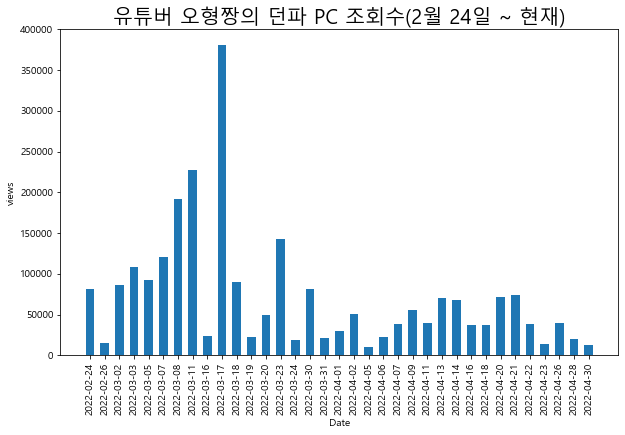

In [52]:
xs = df_PC_new_views.index
ys = df_PC_new_views['views']
plt.figure(figsize=(10, 6)) #그래프 크기 지정
plt.xlabel('Date') #그래프 x축 이름(label) 지정
plt.ylabel('views') #그래프 y축 이름(label) 지정
plt.xticks(rotation = 90)
plt.title('유튜버 오형짱의 던파 PC 조회수(2월 24일 ~ 현재)',fontsize=20) ## 타이틀 설정
plt.bar(xs, ys, width=0.6) #리스트로 저장한 xs와 ys로 막대(bar) 그래프 플롯

### 던파 M 그래프

In [41]:
# 데이터 필터링. 
# - 값 가진 데이터 제거
condition = df_M.video_id != '-'
df_M_new = df_M.loc[condition, :]
# 3월 24일 이전 데이터 제거. 던파 M이니까
condition2 = df_M_new.date >= '2022-03-24'
df_M_new = df_M_new.loc[condition2, :]
# 결측값 제거
df_M_new = df_M_new.dropna()

# views 데이터 타입 str에서 int로 변경
df_M_new = df_M_new.astype({'views':'int'})

In [43]:
df_M_new

,title,video_id,date,category_id,views,likes,comments
12,"【던파모바일】 던파M 피로도 쿠폰 받아가세요!! (레벨업 피로도, 과금 완벽 정리)",qnZMjEsrwvM,2022-03-24,20,19395,95,8
1,【던파 모바일】 던파M 복귀한 아재들 근황ㅋㅋㅋㅋㅋ#shorts,3sZpRE86DUQ,2022-03-25,20,162927,609,102
2,【던파 모바일】 던파M 복귀한 아재들 근황ㅋㅋㅋㅋㅋ#shorts,3sZpRE86DUQ,2022-03-25,20,162927,609,102
22,【던파모바일】 드디어 밝혀진 키리의 비밀!! (던파M 스토리),Y4ISmyQilkE,2022-03-25,20,6247,32,12
18,【던파M】 진짜로 준다고..? 쿠폰 받아가세요!! 던파 모바일 피로도 이벤트,YvyArM8ssEo,2022-03-25,20,9826,48,13
9,"【던파모바일】 랭킹 1위 달성 기념 던파M 결투장 직업 티어표, 결투장 추천 가이드",0OsWkGya8L0,2022-03-26,20,30470,74,78
0,【던파모바일】 캐릭 순위는 이것만 보면 끝! 던파M 4월 직업계급표! (전 직업 캐...,6_VD_AKWdX0,2022-03-27,20,266743,788,331
8,【던파모바일】 아니 어떻게 랭킹 1등이 핵임? (월드보스 핵쟁이 등장),pE_2Swhcxb8,2022-03-28,20,30526,118,47
3,【던파모바일】 무자본으로 레압풀셋?! 던파M 일확천금을 노려보자 파밍꿀팁 (DNF ...,RmjWLPr6Yy8,2022-03-29,20,97734,330,76
13,【던파모바일】 무자본 이것만 챙기면 끝! 던파M 필수 컨텐츠 총정리 (DNF Mob...,UJ5rP4V03Z0,2022-03-31,20,18368,117,25


In [47]:
# 한 날짜에 여러 동영상을 올리는 경우가 있다. 이 경우엔 영상들의 조회수 합을 구해야하기 때문에 groupby 사용
df_M_new_views = df_M_new.groupby('date').sum()

<BarContainer object of 11 artists>

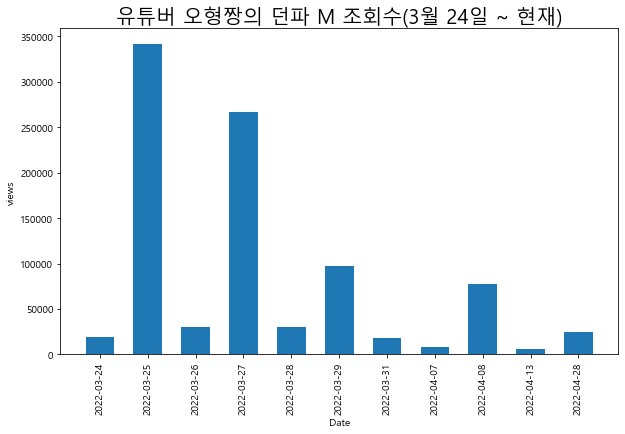

In [53]:
xs = df_M_new_views.index
ys = df_M_new_views['views']
plt.figure(figsize=(10, 6)) #그래프 크기 지정
plt.xlabel('Date') #그래프 x축 이름(label) 지정
plt.ylabel('views') #그래프 y축 이름(label) 지정
plt.xticks(rotation = 90)
plt.title('유튜버 오형짱의 던파 M 조회수(3월 24일 ~ 현재)',fontsize=20) ## 타이틀 설정
plt.bar(xs, ys, width=0.6) #리스트로 저장한 xs와 ys로 막대(bar) 그래프 플롯